# Linear Regression – House price prediction

In this notebook, I build a linear regression model to predict house prices based on numerous features such as square footage, number of bedrooms,location, etc 



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
#Load dataset
data = pd.read_csv ("train.csv")

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Checking out the types of data I am working with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Dropping the columns I think are irrelevant
data.drop (columns = ['Fence','MiscFeature','FireplaceQu', 'MasVnrType','PoolQC','Alley'], inplace =True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
#Selecting columns with missing  values and filling them in with 0.

cols_to_fill_zero = ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageYrBlt','GarageType','Electrical', 
                     'BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','MasVnrArea', 'LotFrontage']  
                     
                    
                     
data[cols_to_fill_zero] = data[cols_to_fill_zero].fillna(0)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Categorical variables cannot be used directly by linear regression models, 
so I convert them into numeric form using one-hot encoding.


In [10]:
#Doing one hot encoding for categorical data
data = pd.get_dummies(data, columns=['MSZoning', 'Street','LotShape', 'LandContour','Utilities', 'LotConfig', 'LandSlope',
                                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd','ExterQual', 'ExterCond',
                                      'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',  
                                    'BsmtFinType2', 'Heating', 'HeatingQC','CentralAir', 'Electrical', 'KitchenQual',
                                    'Functional','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
                                     'SaleType', 'SaleCondition' ], drop_first=True, dtype=int)

In [11]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [12]:
#Checking on correlation of data
corr = data.corr()

In [13]:
print (corr)

                             Id  MSSubClass  LotFrontage   LotArea  \
Id                     1.000000    0.011156    -0.019761 -0.033226   
MSSubClass             0.011156    1.000000    -0.215023 -0.139781   
LotFrontage           -0.019761   -0.215023     1.000000  0.100739   
LotArea               -0.033226   -0.139781     0.100739  1.000000   
OverallQual           -0.028365    0.032628     0.176561  0.105806   
...                         ...         ...          ...       ...   
SaleCondition_AdjLand -0.034852    0.016241    -0.004724 -0.013208   
SaleCondition_Alloca  -0.009018    0.030002    -0.009519  0.008966   
SaleCondition_Family   0.004865    0.000983     0.028489 -0.010781   
SaleCondition_Normal   0.015881    0.024359    -0.134115  0.005711   
SaleCondition_Partial -0.020738   -0.051068     0.184103  0.022635   

                       OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                       -0.028365     0.012609  -0.012713     -0.021998   
MSSubCl

In [14]:
corr ['SalePrice'].sort_values (ascending = False)

SalePrice            1.000000
OverallQual          0.790982
GrLivArea            0.708624
GarageCars           0.640409
GarageArea           0.623431
                       ...   
GarageType_Detchd   -0.354141
GarageFinish_Unf    -0.410608
BsmtQual_TA         -0.452394
KitchenQual_TA      -0.519298
ExterQual_TA        -0.589044
Name: SalePrice, Length: 240, dtype: float64

In [15]:
data.nunique()

Id                       1460
MSSubClass                 15
LotFrontage               111
LotArea                  1073
OverallQual                10
                         ... 
SaleCondition_AdjLand       2
SaleCondition_Alloca        2
SaleCondition_Family        2
SaleCondition_Normal        2
SaleCondition_Partial       2
Length: 240, dtype: int64

In [16]:
#separating data into features and target	
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [17]:
#creating data split for training and validation

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=5)


In [18]:
#initiating the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
#training
model.fit(train_X, train_y)

LinearRegression()

In [20]:
#make predictions
y_pred = model.predict (test_X) 

In [21]:
#check r2 for training set
model.score (train_X, train_y)

0.9319737818255669

In [22]:
#check r2 for validation set
model.score (test_X, test_y)

0.8989986983636732

In [23]:
#calculating MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error (test_y, y_pred)

In [24]:
#checking the square root of MSE
print (mse)
rmse = np.sqrt (mse)
print (rmse)

655499114.081043
25602.716927721616


In [25]:
#just another way to check r2
from sklearn.metrics import r2_score
r2 = r2_score (test_y, y_pred)

In [26]:
print (r2)

0.8989986983636732


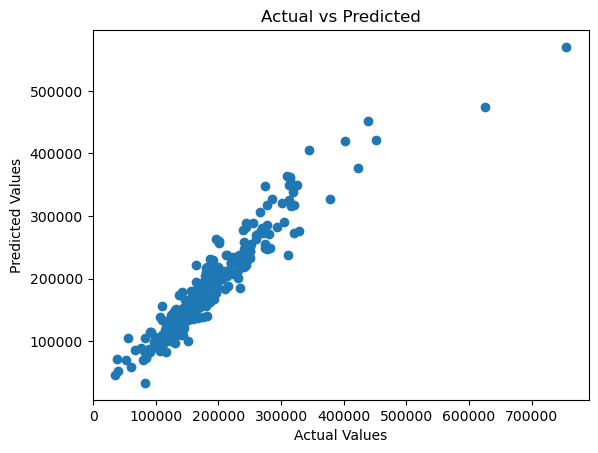

In [27]:
#plotting the scatter plot to visualize model performance
import matplotlib.pyplot as plt

plt.scatter (test_y, y_pred)
plt.xlabel ('Actual Values')
plt.ylabel ('Predicted Values')
plt.title ('Actual vs Predicted')
plt.show()

## Conclusion

For a basic linear model without feature scaling or regularization, this is a strong result, with an R2 score of 0.89 and an RMSE of 25,602. For house price prediction, this level of error is relatively small and indicates that the model captured most of the underlying patterns in the data.
